<a href="https://colab.research.google.com/github/al-dayviid21/FakeNewsPrediction/blob/master/Copy_of_FakeNewsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In recent years, the proliferation of fake news has become a significant concern in the digital age. Fake news is intentionally created to mislead readers, often with the aim of spreading propaganda or misinformation. The consequences of fake news can be far-reaching, leading to social and political upheaval and undermining the credibility of traditional news sources. With the advent of machine learning, researchers have started to explore the potential of using computational methods to detect and predict fake news. Machine learning algorithms can be trained to analyze various features of news articles, such as the language, source, and content, to identify patterns that distinguish fake news from real news. The development of accurate and efficient machine learning models for fake news prediction has the potential to mitigate the negative impact of fake news and promote the dissemination of accurate and reliable information.

# Feature Description

Title: The headline or caption of the news or article.

Text: Body of the news or article.

Label: Indicates if the news is Fake (1) or Real (0).

# Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk import sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
import gensim
from gensim.utils import simple_preprocess
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
df = pd.read_csv('news.csv', engine='python')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


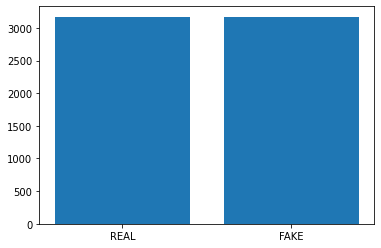

In [44]:
label = df['label'].value_counts()
plt.bar(label.index, label.values);

# Split Dataset

for this initial model, we will only work with the body of the article. Subsequently, we will integrate the title to see its effect on the accuracy of the model

In [45]:
y = df['label'].map({'FAKE':1, 'REAL':0})
X = df['text']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocess data

In [47]:
lemmatizer = WordNetLemmatizer()

In [49]:
X_train = X_train.str.lower()

In [50]:
def remove_char(text):
    return re.sub('[^a-zA-Z]', ' ', text)
X_train = X_train.apply(remove_char)

In [51]:
def lemmatize_text(text):
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
  text = ' '.join(text)
  return text

In [52]:
X_train = X_train.apply(lemmatize_text)

In [54]:
X_test = X_test.str.lower()

In [55]:
X_test = X_test.apply(remove_char)

In [56]:
X_test = X_test.apply(lemmatize_text)

# Implement TFIDF 

In [57]:
tv = TfidfVectorizer(max_features=2500, binary=True)
X_train = tv.fit_transform(X_train).toarray()


In [58]:
X_test = tv.transform(X_test).toarray()

# Modelling

In [61]:
models = [('SVC', SVC()), ('KNN', KNeighborsClassifier(n_neighbors=10)),
         ('GNB', GaussianNB()), ('RFC', RandomForestClassifier()),
         ('XGB', XGBClassifier()), ('MNB', MultinomialNB())]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    results.append((name, score))
results.sort(key=lambda a:a[1], reverse=True)

In [62]:
results

[('SVC', 0.930544593528019),
 ('RFC', 0.8910812943962115),
 ('XGB', 0.8871349644830308),
 ('GNB', 0.8587213891081295),
 ('MNB', 0.8531965272296764),
 ('KNN', 0.516179952644041)]

The model of choice is SVC with an accuracy of 93%

In [66]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
score = accuracy_score(y_test, y_pred)
score

0.930544593528019

In [69]:
confusion_matrix(y_test, y_pred)

array([[604,  48],
       [ 40, 575]])

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       652
           1       0.92      0.93      0.93       615

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



# Summary


1.   The dataset is balanced
2.   The model of choice is Support Vector Machine
3.   The accuracy of the model is 93%
